# Combine DIC data with X-ray in order to calculate multiaxial flow curve

- Use pylab inline

In [1]:
pwd

u'/Users/yj/repo/FLD_DIC_XRAY/tutorials/XRD_analysis/IF_steel/PSTD'

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


- Dependents

In [3]:
import os, time
from MP.mat import mech
from glob import glob
import RS
reload(RS)
from RS import sfig_class
reload(sfig_class)

from RS import analyze_proto,sff_plot
import matplotlib as mpl
from MP import progress_bar, lib
from MP import mat
mech=mat.mech

mpl_lib=lib.mpl_lib
uet=progress_bar.update_elapsed_time
GS=mpl.gridspec.GridSpec
fc=mat.mech.FlowCurve

- Name of DIC files

In [4]:
ls /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/DIC

DIC_results.txt  cal-0004_0.mat   cal-0008_0.mat   cal-0096_0.mat   cal-0128_0.mat   cal-0157_0.mat   cal-0180_0.mat   cal-0202_0.mat   cal-0222_0.mat   cal-0241_0.mat   cal-0306_0.mat   cal-0397_0.mat
cal-0001_0.mat   cal-0005_0.mat   cal-0072_0.mat   cal-0112_0.mat   cal-0141_0.mat   cal-0168_0.mat   cal-0190_0.mat   cal-0211_0.mat   cal-0231_0.mat   cal-0250_0.mat   cal-0351_0.mat
cal-0002_0.mat   cal-0006_0.mat   cal-0073_0.mat   cal-0113_0.mat   cal-0142_0.mat   cal-0169_0.mat   cal-0191_0.mat   cal-0212_0.mat   cal-0232_0.mat   cal-0251_0.mat   cal-0352_0.mat
cal-0003_0.mat   cal-0007_0.mat   cal-0095_0.mat   cal-0127_0.mat   cal-0156_0.mat   cal-0179_0.mat   cal-0201_0.mat   cal-0221_0.mat   cal-0240_0.mat   cal-0305_0.mat   cal-0396_0.mat


In [5]:
date='20120717'
path=os.path.join('/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS')
fn_DIC=os.path.join(path,date,'DIC','DIC_results.txt')
dic_dat=np.loadtxt(fn_DIC,skiprows=1).T
#print dic_dat

# Read lab note book in order to match Xray file and DIC index

In [6]:
print os.popen('ls -s %s'%os.path.join(path,date,'Xray/*.tr')).read()

904 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/16JUL12_0012.tr
904 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/17JUL12_0002.tr
904 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/17JUL12_0005.tr
904 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/17JUL12_0007.tr
904 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/17JUL12_0008.tr
904 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/17JUL12_0010.tr
904 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/17JUL12_0012.tr
904 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/17JUL12_0013.tr
904 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/17JUL12_0014.tr
904 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/17JUL12_0015.tr
904 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/17JUL12_0016.tr

- Making a fref file for Proto data analysis

In [8]:
major_vij=2
# ------------------------------------------------------------------------
# Find suitable experimental stress factor file
#fn_sff='/Users/yj/GoogleDrive/expdat/Marciniak-X-ray-IF/YJ_BB_10times.sff'
#fn_sff='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/IF_PSTD_SWAP.sff'
fn_sff='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/IF_PSTD_phi_SWAP.sff'
#fn_sff='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/IF_PSTD_SWAP_SWAP.sff'

# ------------------------------------------------------------------------
# Refer to Laboratory notebook to match up the X-ray data filename 
# and DIC image number

## Removed these lines: #7  17JUL12_0012.tr; #8  17JUL12_0012.tr
DIC_XRD="""#72  17JUL12_0013.tr
#73  17JUL12_0013.tr
#95  17JUL12_0014.tr
#96  17JUL12_0014.tr
#112 17JUL12_0015.tr
#113 17JUL12_0015.tr
#127 17JUL12_0016.tr
#128 17JUL12_0016.tr
#141 17JUL12_0017.tr
#142 17JUL12_0017.tr
#156 17JUL12_0018.tr
#157 17JUL12_0018.tr
#168 17JUL12_0019.tr
#169 17JUL12_0019.tr
#179 17JUL12_0020.tr
#180 17JUL12_0020.tr
#190 17JUL12_0021.tr
#191 17JUL12_0021.tr
#201 17JUL12_0022.tr
#202 17JUL12_0022.tr
#211 17JUL12_0023.tr
#212 17JUL12_0023.tr
#221 17JUL12_0024.tr
#222 17JUL12_0024.tr
#231 17JUL12_0025.tr
#232 17JUL12_0025.tr
#240 17JUL12_0026.tr
#241 17JUL12_0026.tr
#250 17JUL12_0027.tr
#251 17JUL12_0027.tr
#305 17JUL12_0028.tr
#306 17JUL12_0028.tr
#351 17JUL12_0029.tr
#352 17JUL12_0029.tr
#396 17JUL12_0030.tr
#397 17JUL12_0030.tr"""

# ------------------------------------------------------------------------



In [9]:
fn_fref=fn_DIC.split('DIC')[0]+'f_fref.txt'
f_fref=open(fn_fref,'w')
f_fref.write(fn_sff)
f_fref.write('  MajorStrainColumn: %i\n'%major_vij)
f_fref.write(('%14s'+'%12s '*4+' %5s'+'%12s '*4+' %14s\n')%(
        'filename','Exx','Eyy','Exy','Ezz','DIC','Exx_e','Eyye','SIG_a','SIG_e','Date'))

lines=DIC_XRD.split('\n')
inds = []; fns = []
## flow curve obj
myfc=fc()
Ex,Ey,Exy,Ez=[],[],[],[]

Ex_std =[]
Ey_std =[]
DIC_sigma_avg=[]; DIC_sigma_std=[]
for line in lines:
    ind,fn=line.split()
    ind=int(ind.split('#')[-1])
    fn = fn.split('.tr')[0]
    inds.append(ind); fns.append(fn)
    
    col = dic_dat[0]
    ix=np.where(col==ind)[0]
    i = int(col[ix][0]) ## dic index
    # print ix,i

    exx = dic_dat[5][ix]
    eyy = dic_dat[7][ix]
    exy = dic_dat[9][ix]
    ezz = -exx-eyy    
    
    # -----------------------------------------
    """ Additional elements..."""
    exx_std       = dic_dat[6][ix]
    eyy_std       = dic_dat[8][ix]
    DIC_sigma_a   = dic_dat[11][ix]
    DIC_sigma_e   = dic_dat[12][ix]
    # -----------------------------------------

    f_fref.write(('%14s '+'%+11.5e '*4+'%5i '+'%+11.5e '*4+' %14s\n')%(
            fn, exx, eyy, exy, ezz,i,exx_std,eyy_std,DIC_sigma_e,DIC_sigma_e,date))
    Ex.append(exx);Ey.append(eyy);Exy.append(exy);Ez.append(ezz)
    Ex_std.append(exx_std)
    Ey_std.append(eyy_std)
    DIC_sigma_avg.append(DIC_sigma_a)
    DIC_sigma_std.append(DIC_sigma_e)

myfc.get_strain(Ex,0,0)
myfc.get_strain(Ey,1,1)
myfc.get_strain(Exy,0,1)
myfc.get_strain(Exy,1,0)
myfc.get_strain(Ez,2,2)
myfc.set_zero_epsilon_ij(2,1)
myfc.set_zero_epsilon_ij(0,2)
myfc.get_vm_strain()
myfc.get_vm_stress()

myfc.DIC_sigma_avg=DIC_sigma_avg
myfc.DIC_sigma_std=DIC_sigma_std
myfc.Ex_std=Ex_std
myfc.Ey_std=Ey_std

f_fref.close()
print '-'*50
print fn_fref, 'has been created:\n Use it for further stress analysis'
print '-'*50

--------------------------------------------------
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/f_fref.txt has been created:
 Use it for further stress analysis
--------------------------------------------------


In [10]:
print os.popen('head -n 5 %s'%fn_fref).read()

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/IF_PSTD_phi_SWAP.sff  MajorStrainColumn: 2
      filename         Exx          Eyy          Exy          Ezz    DIC       Exx_e         Eyye        SIG_a        SIG_e            Date
  17JUL12_0013 -6.62313e-04 +8.48211e-03 +4.34485e-04 -7.81980e-03    72 +8.64880e-04 +2.01084e-03 +5.07957e-03 +5.07957e-03        20120717
  17JUL12_0013 -7.84625e-04 +8.33661e-03 +3.86948e-04 -7.55198e-03    73 +1.07857e-03 +2.14833e-03 +5.26325e-03 +5.26325e-03        20120717
  17JUL12_0014 -8.85149e-04 +1.38281e-02 +4.88439e-04 -1.29430e-02    95 +1.12387e-03 +2.35178e-03 +5.14230e-03 +5.14230e-03        20120717



+ Running analyze_proto.main for the X-ray and DIC experiments to calculate
  stress/strain

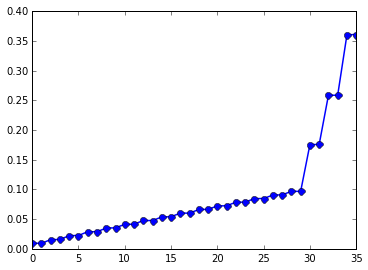

In [11]:
plot(myfc.epsilon_vm,'-o')

## Determine representative strain levels for stress determination

In [12]:
#sff_plot.'/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/IF_PSTD.sff'
eps_sff=sff_plot.readeps(fn=fn_sff,lb='\n')
print eps_sff
fc_sff=fc()

# for PSTD, E2=eps_sff
e22=np.array(eps_sff)
e11=np.zeros((len(e22),))
e33=-e22
print e11,e22,e33

fc_sff.get_strain(e11,i=0,j=0)
fc_sff.get_strain(e22,i=1,j=1)
fc_sff.get_strain(e33,i=2,j=2)
fc_sff.set_zero_shear_strain()
fc_sff.get_vm_strain()
print fc_sff.epsilon_vm

[0.0, 0.16, 0.275]
[ 0.  0.  0.] [ 0.     0.16   0.275] [-0.    -0.16  -0.275]
[ 0.          0.18475209  0.31754265]


In [13]:
## plastic strain of the points where the X-ray d-spacing
## were meausured are important information that is utilized over the X ray analysis.
## If, fc or fn_str are not given, the below application
## bases on the strain given in the fref file -
## the two major strain components are used with assumption
## that the sample was in 'equi-biaxial' strain.

t0=time.time()
RS=analyze_proto.main(
    path=os.path.join(path,date,'Xray'),
#    path='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/Xray/',
    fn_sf=fn_sff,fref=fn_fref,fc=fc_sff,
    ind_plot=True)
uet(time.time()-t0);print

fc was given

#-----------------------------------------------------#
 Interpolate SF and IG for matching with D-spacings
epsilon_vm:
[ 0.00943518  0.00920678  0.0154816   0.01566127  0.02218572  0.02235227
  0.02881995  0.02864731  0.03504641  0.03515676  0.04124741  0.04128288
  0.04766622  0.04748064  0.05368018  0.05384518  0.06015012  0.05995425
  0.06622129  0.06635996  0.07221461  0.07234707  0.07845569  0.07844551
  0.08454316  0.08456624  0.09054192  0.09072755  0.09679189  0.09665895
  0.17547422  0.17566507  0.25843025  0.25853623  0.36035345  0.36062253]
Strain reference at which sf was measured:
[ 0.          0.18475209  0.31754265]
  ** Phi angles of SF are different **
  ** Phi angles of IG are different **
#-----------------------------------------------------#
-----------------------------------
Standard deviation in d_ehkl at istp=0

phi:     -90        0       45      135  avg
std: 6.4e-05  1.7e-04  1.3e-04  1.7e-04  1.3e-04 
Elapsed time:  50 [sec]


(36, 4, 14)
4 14


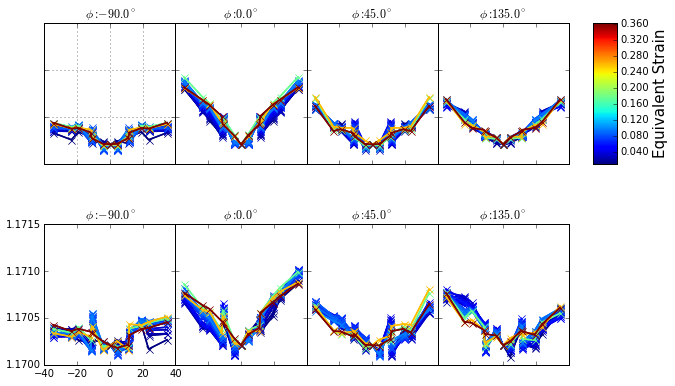

In [14]:
print RS.EXP.ehkl.shape
print RS.EXP.nphi, RS.EXP.npsi
RS.EXP.plot_all()

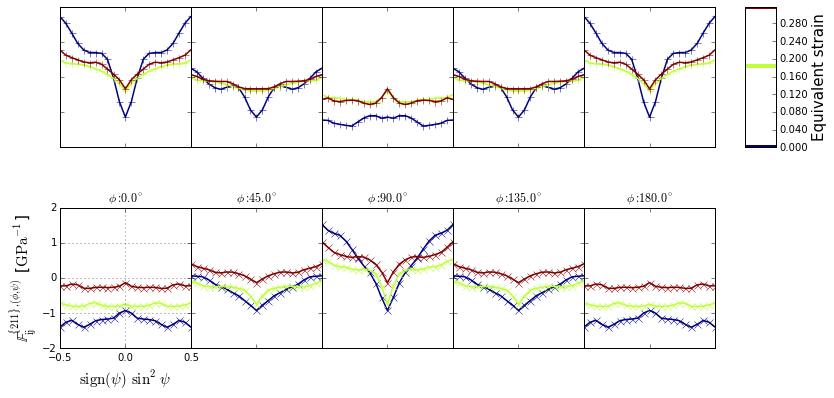

In [15]:
RS.SF_orig.plot()

In [16]:
print RS.SF.sf_old.shape
print RS.SF.sf.shape
RS.SF.sf

(36, 5, 23, 6)
(36, 4, 14, 6)


array([[[[  1.04175885e-12,  -1.32881495e-12,              nan,
                       nan,              nan,              nan],
         [  2.61376418e-13,  -1.11096786e-12,              nan,
                       nan,              nan,              nan],
         [ -1.01764447e-14,  -1.07612259e-12,              nan,
                       nan,              nan,              nan],
         ..., 
         [ -1.01764447e-14,  -1.07612259e-12,              nan,
                       nan,              nan,              nan],
         [  2.61376418e-13,  -1.11096786e-12,              nan,
                       nan,              nan,              nan],
         [  1.04175885e-12,  -1.32881495e-12,              nan,
                       nan,              nan,              nan]],

        [[ -1.35687112e-12,   7.81701864e-13,              nan,
                       nan,              nan,              nan],
         [ -1.15476012e-12,   5.72923628e-13,              nan,
                

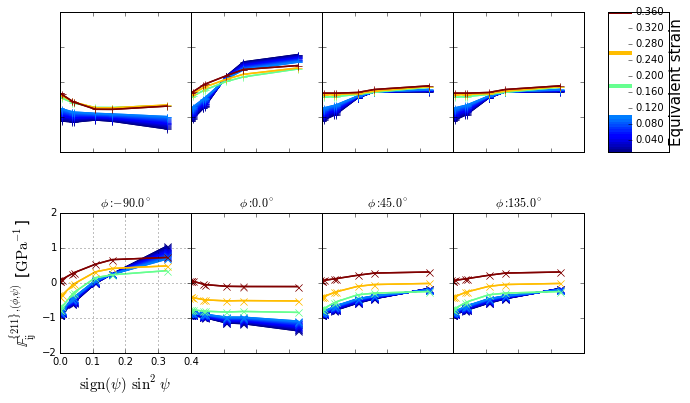

In [17]:
RS.SF.plot()
fig=plt.gcf()
for ax in fig.axes:
    ax.set_xlim(0.,0.4)

In [18]:
print fn_sff

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/IF_PSTD_phi_SWAP.sff


In [19]:
help(sff_plot.f1122)

Help on function f1122 in module RS.sff_plot:

f1122(fn='debug.sff', ifig=1, iphi=0, i=1, j=1, ilab=True, title='EVPSC', ls='-', ieps=None)
    Arguments
    fn   = 'debug.sff'
    ifig = 1
    iphi = 1
    i    = 1 (starts from 1)
    j    = 1 (starts from 1)
    ilab = True
    ls   = '-'



In [20]:
dum=sff_plot.reader(fn=fn_sff,lb='\n')
psi=sff_plot.readpsi(fn=fn_sff,lb='\n')

23


In [21]:
sf=dum[0]

In [22]:
sf.shape

(3, 5, 23, 6)

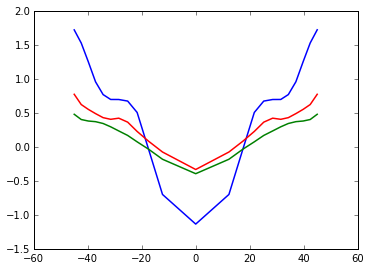

In [23]:
m=['x','o','+']
for i in range(3):
    f11 = sf[i,0,:,0]
    f22 = sf[i,0,:,1]
    l,=plot(psi,f22,'-')
    #plot(psi,f22,m[i],color=l.get_color(),label='epsilon: %i'%i)
# legend(loc='upper center')

23
#phivalues	5																											
nphi: 5
23
#phivalues	5																											
nphi: 5


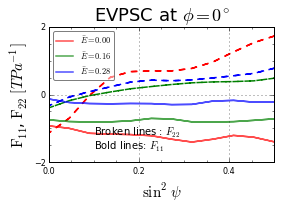

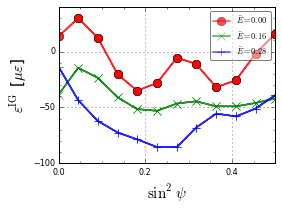

In [24]:
sff_plot.f1122(fn=fn_sff,i=1,j=1,iphi=0,ifig=0)
#sff_plot.f1122(fn=fn_sff,i=1,j=1,iphi=1,ifig=4)
#sff_plot.f1122(fn=fn_sff,i=1,j=1,iphi=2,ifig=8)
#sff_plot.f1122(fn=fn_sff,i=1,j=1,iphi=3,ifig=12)

(-50, 600.0)

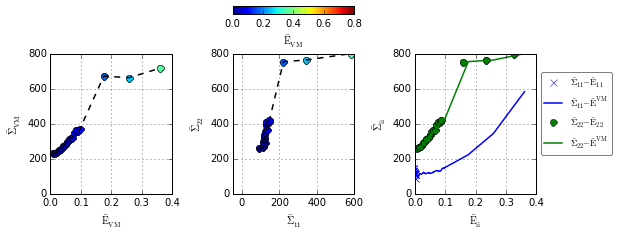

In [25]:
""" 
RS.EXP.flow.epsilon, RS.flow.sigma
"""
mn=0;mx=0.8
norm = mpl.colors.Normalize(vmin=mn,vmax=mx)
cmap, m = mpl_lib.norm_cmap(mn=mn,mx=mx)


i0=1; i1=1


fx=9
fy=fx*0.35
fig=plt.figure(figsize=(fx,fy))
gs=GS(20,3,wspace=0.5)
ax1=fig.add_subplot(gs[5:,0])
ax2=fig.add_subplot(gs[5:,1])
ax3=fig.add_subplot(gs[5:,2])

nstp = RS.EXP.flow.nstp


for istp in xrange(nstp):
    c=m.to_rgba(RS.EXP.flow.epsilon_vm[istp])
    ax2.plot(RS.flow.sigma[0,0][istp],RS.flow.sigma[1,1][istp],
             'o',mec='k',mfc=c)
    ax1.plot(RS.EXP.flow.epsilon_vm[istp],RS.flow.sigma_vm[istp],'o',c=c)

ax2.plot(RS.flow.sigma[0,0],RS.flow.sigma[1,1],'k--')
ax1.plot(RS.EXP.flow.epsilon_vm,RS.flow.sigma_vm,'k--')

l,=ax3.plot(RS.EXP.flow.epsilon[0,0],RS.flow.sigma[0,0],'x',label=r'$\mathrm{\bar{\Sigma}_{11} - \bar{E}_{11}}$')
ax3.plot(RS.EXP.flow.epsilon_vm,RS.flow.sigma[0,0],'-',color=l.get_color(),label=r'$\mathrm{\bar{\Sigma}_{11} - \bar{E}^{VM}}$')


l,=ax3.plot(RS.EXP.flow.epsilon[1,1],RS.flow.sigma[1,1],'o',label=r'$\mathrm{\bar{\Sigma}_{22} - \bar{E}_{22}}$')
ax3.plot(RS.EXP.flow.epsilon_vm,RS.flow.sigma[1,1],'-',color=l.get_color(),label=r'$\mathrm{\bar{\Sigma}_{22} - \bar{E}^{VM}}$')



for ax in fig.axes:
    ax.set_ylim(0.,);ax.set_xlim(0.,)
    ax.locator_params(nbins=4)
    ax.grid()

ax2.set_xlabel(r'$\mathrm{\bar{\Sigma}_{11}}$')
ax2.set_ylabel(r'$\mathrm{\bar{\Sigma}_{22}}$')
ax3.set_xlabel(r'$\mathrm{\bar{E}_{ii}}$')
ax3.set_ylabel(r'$\mathrm{\bar{\Sigma}_{ii}}$')
ax1.set_xlabel(r'$\mathrm{\bar{E}_{VM}}$')
ax1.set_ylabel(r'$\mathrm{\bar{\Sigma}_{VM}}$')
ax3.legend(loc='best',fontsize=9,numpoints=1,bbox_to_anchor=(1,0.9))


axcb=fig.add_subplot(gs[0,1])
cb=mpl.colorbar.ColorbarBase(axcb,cmap=cmap,orientation='horizontal',
                          norm=norm,filled=True,format='%3.1f')
# axcb.locator_params(nbins=4)
axcb.set_xlabel(r'$\mathrm{\bar{E}_{VM}}$')
cb.set_ticks(np.linspace(mn,mx,5))

gcf().axes[1].set_xlim(-50)

- Pickle the object 'RS' and save to a file

In [26]:
import cPickle as pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

fn = os.path.join(path,date,'RS.pck')
print fn
save_object(obj=RS, filename=fn)

fn = os.path.join('../../../pickles/RS_%s.pck'%date)
print os.path.join(os.getcwd(),fn)
save_object(obj=RS, filename=fn)


fn = os.path.join('../../../pickles/RS_DIC_%s.pck'%date)
print os.path.join(os.getcwd(),fn)
save_object(obj=myfc, filename=fn)

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120717/RS.pck
/Users/yj/repo/FLD_DIC_XRAY/tutorials/XRD_analysis/IF_steel/PSTD/../../../pickles/RS_20120717.pck
/Users/yj/repo/FLD_DIC_XRAY/tutorials/XRD_analysis/IF_steel/PSTD/../../../pickles/RS_DIC_20120717.pck
